# Filtro pasivo pasa-bajos (7)

In [7]:
%pylab inline
rc('text', usetex=True)
rc('font', family='serif')
rcParams['figure.figsize'] = (10.0, 9.0)

Populating the interactive namespace from numpy and matplotlib


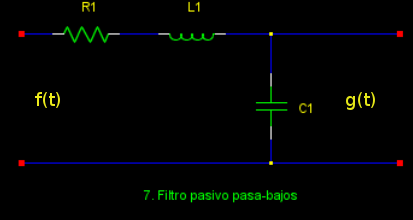

In [8]:
from IPython.display import Image
I = Image(filename="filtro7.png")
I


### 1.- Calcular la función de transferencia
Resolvemos el circuito por fasores:

$$f( \omega ) = V_R( \omega ) + V_c( \omega ) + V_L ( \omega )$$


$$V_R = I(  \omega ) \cdot R$$
$$V_L = I(  \omega ) \cdot j \omega L$$
$$G( \omega ) = V_C = I(  \omega ) \cdot \frac{1}{j \omega C}$$

Sustituyendo:

$$I( \omega ) = \frac{f( \omega )}{R + j \omega L + \frac{1}{j \omega C}}$$

La salida queda:

$$G( \omega ) = \frac{1}{j \omega C} \frac{F( \omega )}{R + j \omega L + \frac{1}{j \omega C}} = \frac{F( \omega )}{jR \omega C - \omega ^ 2 LC +1} $$

La función de transferencia:

$$ H( \omega ) = \frac{1}{jR \omega C - \omega ^ 2 LC +1} $$

### Respuesta impulsiva

La respuesta impulsiva es la transformada de Fourier inversa de la función de transferencia:

$$ h(t) = \int_{-\infty}^\infty e^{iwx} \cdot F( \omega ) \mathrm{d}x $$

In [16]:
w = arange(1,100000,1000)
wlog = numpy.logspace(0,5,1000)

def filtroPasivoPasaBajos(w, R, L, C):
    u"""Filtro nº 7"""
    N = len(w)
    H = 1 / ((R * 1j * w * C) - ((w ** 2) * C * L) + 1)
    h = ifft(H * N)
    return(H,h)
    
R,L,C = 15000, 5e-3,1e-8

H, h = filtroPasivoPasaBajos(w,R,L,C)
Hlog, hlog = filtroPasivoPasaBajos(wlog,R,L,C)

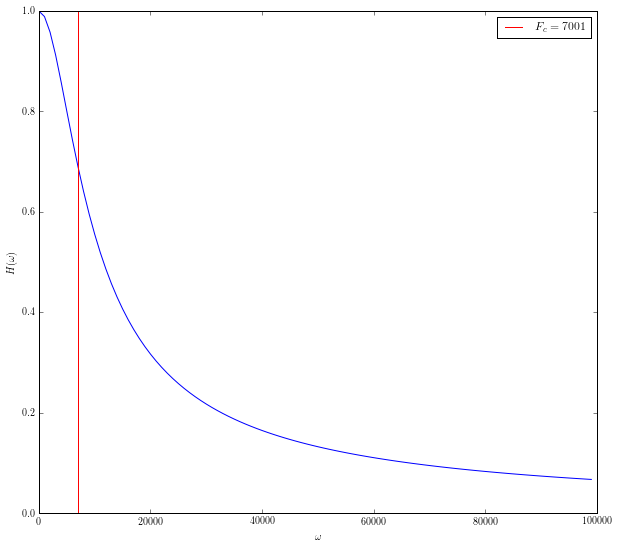

In [24]:
plot(w,abs(H))
fcorind= argmin(abs((abs(H)**2)-0.5))
fcor = w[fcorind]
axvline(fcor, 0,1, c = "r", label="$F_c = {}$".format(fcor))

legend(loc="best")
ylabel(r"$H ( \omega )$")
xlabel(r"$\omega$")


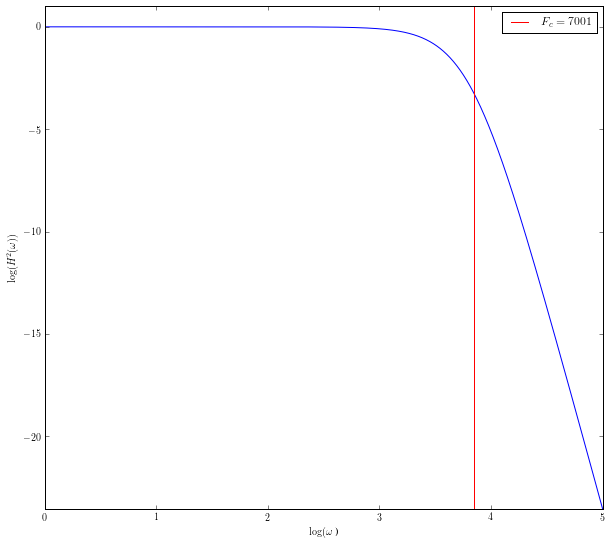

In [18]:
ylim(ymax=1, ymin = min(10*log10(abs(Hlog)**2)))

plot(log10(wlog),10*log10(abs(Hlog)**2))
axvline(log10(fcor), 0, 1, c = "r", label="$F_c = {}$".format(fcor))
ylabel(r"$\log (H^2 ( \omega ))$")
xlabel(r"$\log( \omega$ )")
legend(loc="best")

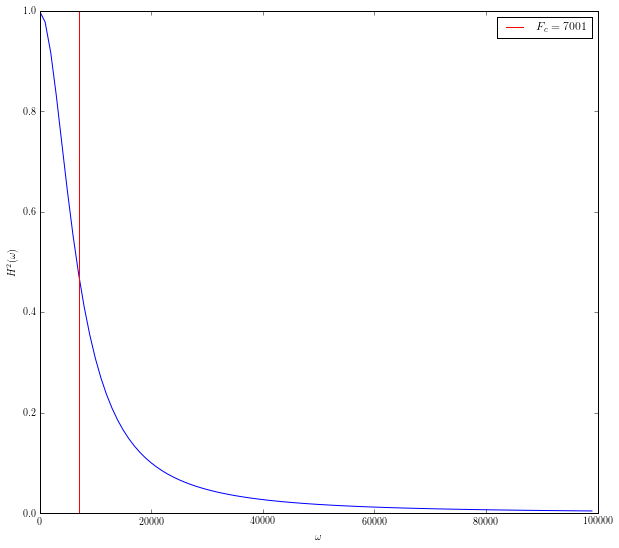

In [23]:
plot(w,abs(H**2))

fcor = w[argmin(abs((abs(H)**2)-0.5))]
axvline(fcor, 0, 1, c = "r", label="$F_c = {}$".format(fcor))

legend(loc="best")
ylabel(r"$H^2 ( \omega )$")
xlabel(r"$\omega$")